# Custom Layers in Keras

# Part 1: Importing Libraries

In [1]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.1.0


# Part 2: Import and Visualize Dataset

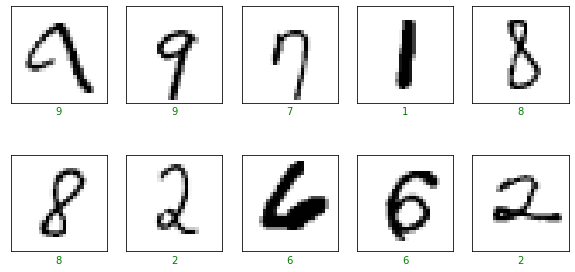

In [2]:
(x_train, y_train), (x_test, y_test) = utils.load_data()

utils.plot_random_examples(x_train, y_train).show()

# Part 3: Creating a Custom Layer

In [3]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name='minimum', 
            shape=(1,),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self).build(input_shape)
    
    def call(self, x):
        return tf.maximum(0., x) + self.alpha * tf.minimum(0., x)

# Part 4: Creating the Model

In [4]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,)))
    if not use_prelu:
        model.add(tf.keras.layers.ReLU())
    else:
        model.add(ParametricRelu())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
parametric_relu (ParametricR (None, 64)                1         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


# Part 5: Model Training

In [5]:
print('Initial alpha:', model.layers[1].get_weights())

h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

print('Final alpha:', model.layers[1].get_weights())

Initial alpha: [array([0.], dtype=float32)]
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 173us/sample - loss: 0.2900 - accuracy: 0.9189 - val_loss: 0.1665 - val_accuracy: 0.9514
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1246 - accuracy: 0.9637 - val_loss: 0.1192 - val_accuracy: 0.9640
Epoch 3/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0886 - accuracy: 0.9736 - val_loss: 0.1054 - val_accuracy: 0.9688
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0700 - accuracy: 0.9788 - val_loss: 0.1003 - val_accuracy: 0.9703
Epoch 5/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0568 - accuracy: 0.9819 - val_loss: 0.0966 - val_accuracy: 0.9706
Final alpha: [array([-0.9566503], dtype=float32)]


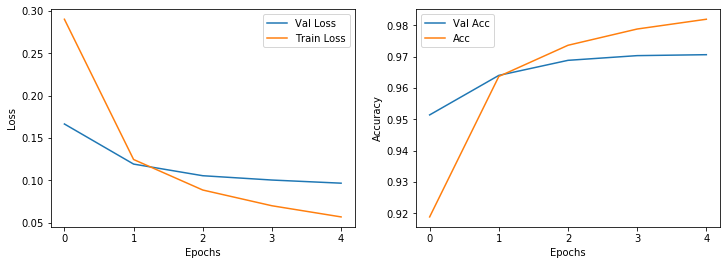

In [6]:
utils.plot_results(h).show()

# Part 6: Comparison with ReLU

In [7]:
model = create_model(use_prelu=False)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3109 - accuracy: 0.9108 - val_loss: 0.1859 - val_accuracy: 0.9443
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1522 - accuracy: 0.9555 - val_loss: 0.1241 - val_accuracy: 0.9617
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1083 - accuracy: 0.9683 - val_loss: 0.1178 - val_accuracy: 0.9655
Epoch 4/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0843 - accuracy: 0.9747 - val_loss: 0.1003 - val_accuracy: 0.9694
Epoch 5/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0696 - accuracy: 0.9789 - val_loss: 0.0886 - val_accuracy: 0.9735


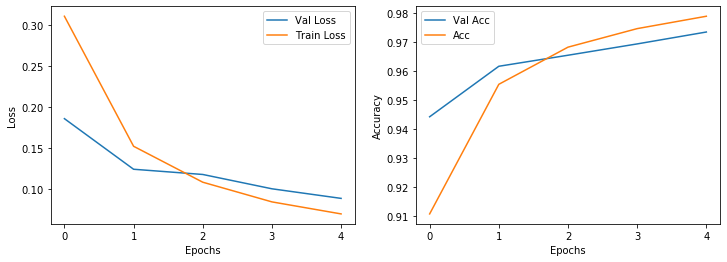

In [9]:
utils.plot_results(h).show()